In [24]:
# Mount to your google drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
#easyocr is a opensource libary that provides a basic character recognition.
#Later on I need to train it for my specific perposes (EVN / Lastgrenzraster,...)
!pip install easyocr

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 16.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 908.3/908.3 kB 27.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 307.2/307.2 kB 22.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.7/23.7 MB 57.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 823.6/823.6 kB 67.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.1/14.1 MB 96.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 731.7/731.7 MB 1.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 410.6/410.6 MB 3.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.6/121.6 MB 8.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.5/56.5 MB 11.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 124.2/124.2 MB 8.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 196.0/196.0 MB 2.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━

In [4]:
# ultralytics is a opensource libary that provides yolo a nice algo for object detection.
# You can adjust yolo parameters to detect your own object. Did it already for EVN
!pip install ultralytics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 721.3/721.3 kB 6.8 MB/s eta 0:00:00


In [5]:
import ssl
import urllib
import os
import re
import time
import easyocr
from matplotlib import pyplot as plt
import numpy as np
import cv2
from ultralytics import YOLO
from ultralytics.utils.plotting import plot_results
print(os.getcwd())

/content


In [6]:
# Checks if wich CPU/GPU the runtime is using
!nvidia-smi

Tue Mar 19 07:54:30 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   36C    P8               9W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

## Preparing Data
The following aproch assumes that the algo shoult work also for real life productive szenarios.
What helped me the most was thistutorial https://www.youtube.com/watch?v=msGOrJIMGy8

Get about 2000 - 5000 Pictures, that shows your Object you want to train yolo for
Label the Picture by using a software like lableIMG. Labeling means creating a box around your Object and say inside the box you the the Object xyz. Store the Picture in the following way:
data
  ¦--train (90% pics)
       ¦--images
       ¦--labels
  ¦--test (5% pics)
       ¦--images
       ¦--labels
  ¦--validate (5% pics)
       ¦--images
       ¦--labels    
       

## Training
Using Yolo you can train on command line or via pytorch. I chooses pytorch cause it is python syntaxs.
I started with Yolo5 but realized that Yolo8 is way faster and better, so i swaped to Yolo8.
If you want to gor for comand line yocommand looks like:
!python train.py --img 1280 --batch 16 --epochs 500 --data /content/yourPathesToYourImages.yaml --weights yolov8n.pt
Whereas yolov8n.pt is the smallest (and weakest) model but the fastes. For detecting Object yolo provides 5 Models, wheras YOLOv8x is the "best" but slowest one. I highly recommend to check this out https://docs.ultralytics.com/de/models/yolov8/#performance-metrics

The training with Yolo is so easy that I dont descibe it her further, just look at the cod

In [28]:
drive.mount("/content/drive", force_remount=True)
os.listdir('/content/drive/MyDrive/Colab_Notebooks/Data/Try_EVN_1280x960/')

Mounted at /content/drive


['yolov8n.pt',
 'dataset.yaml',
 'train',
 'runs_20240310',
 'test',
 'runs',
 'images_',
 'validate',
 '.ipynb_checkpoints']

In [ ]:
yamlPath = '/content/drive/MyDrive/Colab_Notebooks/Data/Try_EVN_1280x960/dataset.yaml'
model = YOLO('yolov8n.pt')

results = model.train(data = yamlPath, epochs = 500, imgsz=1280)

Ultralytics YOLOv8.1.29 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/content/drive/MyDrive/Colab_Notebooks/Data/Try_EVN_1280x960/dataset.yaml, epochs=500, time=None, patience=100, batch=16, imgsz=1280, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train7, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_c

100%|██████████| 755k/755k [00:00<00:00, 21.5MB/s]


Overriding model.yaml nc=80 with nc=18

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytic

train: Scanning /content/drive/MyDrive/Colab_Notebooks/Data/Try_EVN_1280x960/train/labels... 697 images, 18 backgrounds, 0 corrupt: 100%|██████████| 715/715 [05:26<00:00,  2.19it/s]


train: New cache created: /content/drive/MyDrive/Colab_Notebooks/Data/Try_EVN_1280x960/train/labels.cache
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


val: Scanning /content/drive/MyDrive/Colab_Notebooks/Data/Try_EVN_1280x960/validate/labels... 32 images, 2 backgrounds, 0 corrupt: 100%|██████████| 34/34 [00:31<00:00,  1.08it/s]

val: New cache created: /content/drive/MyDrive/Colab_Notebooks/Data/Try_EVN_1280x960/validate/labels.cache


Plotting labels to runs/detect/train7/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000455, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 1280 train, 1280 val
Using 2 dataloader workers
Logging results to runs/detect/train7
Starting training for 500 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/500      9.56G      2.198      9.626      1.965         22       1280: 100%|██████████| 45/45 [00:58<00:00,  1.30s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:05<00:00,  2.66s/it]

                   all         34         37     0.0411      0.418      0.133      0.063



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      2/500      8.81G      1.508      5.943      1.429         19       1280: 100%|██████████| 45/45 [00:51<00:00,  1.14s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.34it/s]

                   all         34         37      0.846      0.379       0.66      0.403



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      3/500      8.86G      1.386      5.143      1.307         23       1280: 100%|██████████| 45/45 [00:57<00:00,  1.29s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.83it/s]


                   all         34         37       0.85      0.646      0.779      0.558

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      4/500      8.86G      1.277      4.363      1.265         26       1280: 100%|██████████| 45/45 [00:55<00:00,  1.23s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.83it/s]

                   all         34         37       0.89      0.837      0.894      0.618



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      5/500      8.82G      1.231      3.976      1.207         26       1280: 100%|██████████| 45/45 [00:53<00:00,  1.19s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.14it/s]

                   all         34         37      0.882      0.795      0.827      0.549



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      6/500      8.76G      1.205      3.508      1.178         28       1280: 100%|██████████| 45/45 [00:57<00:00,  1.27s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.06it/s]

                   all         34         37       0.89      0.864      0.903      0.624



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      7/500      8.76G      1.127      3.186      1.147         18       1280: 100%|██████████| 45/45 [00:58<00:00,  1.30s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.64it/s]

                   all         34         37      0.891      0.878      0.929      0.607



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      8/500       8.8G      1.139      2.957      1.152         25       1280: 100%|██████████| 45/45 [01:01<00:00,  1.37s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.07it/s]

                   all         34         37      0.927      0.857      0.928      0.663



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      9/500      8.76G      1.107      2.718      1.136         22       1280: 100%|██████████| 45/45 [00:56<00:00,  1.25s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.84it/s]

                   all         34         37      0.955      0.814      0.909      0.687



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     10/500      8.76G      1.078      2.401      1.096         17       1280: 100%|██████████| 45/45 [00:56<00:00,  1.25s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.72it/s]

                   all         34         37       0.93      0.899       0.93      0.696



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     11/500      8.76G      1.043      2.311      1.096         27       1280: 100%|██████████| 45/45 [00:56<00:00,  1.25s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.84it/s]

                   all         34         37      0.933      0.899      0.939      0.699



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     12/500      8.76G      1.033      2.107      1.079         25       1280: 100%|██████████| 45/45 [00:56<00:00,  1.25s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.90it/s]

                   all         34         37       0.95      0.893      0.943      0.711



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     13/500      8.76G      1.028      1.995      1.067         21       1280: 100%|██████████| 45/45 [00:53<00:00,  1.18s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.94it/s]


                   all         34         37      0.966      0.914      0.952      0.718

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     14/500      8.76G      1.007      1.842      1.059         17       1280: 100%|██████████| 45/45 [00:55<00:00,  1.23s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.85it/s]

                   all         34         37      0.957      0.918      0.953      0.743



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     15/500      8.76G     0.9935      1.709      1.042         21       1280: 100%|██████████| 45/45 [00:55<00:00,  1.23s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.56it/s]

                   all         34         37      0.992      0.899      0.952      0.731



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     16/500      8.76G     0.9887      1.636      1.047         26       1280: 100%|██████████| 45/45 [00:53<00:00,  1.19s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.58it/s]


                   all         34         37      0.973      0.898      0.951       0.74

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     17/500      8.76G     0.9788      1.578      1.052         16       1280: 100%|██████████| 45/45 [00:56<00:00,  1.25s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.91it/s]

                   all         34         37      0.982       0.92      0.958      0.683



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     18/500      8.76G     0.9794      1.495      1.053         26       1280: 100%|██████████| 45/45 [00:54<00:00,  1.21s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.48it/s]


                   all         34         37      0.992      0.941      0.957      0.748

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     19/500      8.76G     0.9539        1.4      1.024         25       1280: 100%|██████████| 45/45 [00:56<00:00,  1.25s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.77it/s]

                   all         34         37      0.979      0.941      0.961      0.719



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     20/500      8.76G      0.971      1.346      1.031         20       1280: 100%|██████████| 45/45 [00:54<00:00,  1.21s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.88it/s]

                   all         34         37      0.931      0.953      0.958      0.756



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     21/500      8.76G     0.9453      1.255      1.021         18       1280: 100%|██████████| 45/45 [00:54<00:00,  1.22s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.66it/s]

                   all         34         37      0.932      0.896      0.948      0.758



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     22/500      8.78G     0.9109      1.201      1.004         25       1280: 100%|██████████| 45/45 [00:54<00:00,  1.22s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.90it/s]

                   all         34         37      0.889      0.962       0.95      0.671



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     23/500      8.76G      0.889      1.131      1.001         15       1280: 100%|██████████| 45/45 [00:56<00:00,  1.24s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.31it/s]

                   all         34         37      0.957      0.908      0.949      0.728



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     24/500      8.76G     0.9055      1.134      1.006         18       1280: 100%|██████████| 45/45 [00:55<00:00,  1.23s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.13it/s]

                   all         34         37      0.975      0.941       0.96      0.779



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     25/500      8.76G      0.896      1.073     0.9976         20       1280: 100%|██████████| 45/45 [00:54<00:00,  1.22s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.77it/s]

                   all         34         37      0.978      0.937      0.961      0.787



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     26/500       8.8G      0.905      1.061          1         31       1280: 100%|██████████| 45/45 [00:54<00:00,  1.22s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.89it/s]

                   all         34         37      0.926      0.933      0.956      0.776



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     27/500      8.76G     0.8806      1.017     0.9969         21       1280: 100%|██████████| 45/45 [00:54<00:00,  1.20s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.54it/s]

                   all         34         37      0.945      0.939       0.96      0.732



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     28/500      8.76G     0.9028     0.9959     0.9982         23       1280: 100%|██████████| 45/45 [00:56<00:00,  1.25s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.70it/s]

                   all         34         37      0.965      0.951      0.963      0.749



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     29/500       8.8G     0.8908     0.9582     0.9925         27       1280: 100%|██████████| 45/45 [00:54<00:00,  1.20s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.94it/s]

                   all         34         37      0.967      0.941      0.958      0.749



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     30/500       8.8G     0.8532     0.9373     0.9806         20       1280: 100%|██████████| 45/45 [00:54<00:00,  1.20s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.96it/s]

                   all         34         37      0.979      0.958      0.962      0.765



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     31/500      8.76G     0.8827     0.9416      0.983         22       1280: 100%|██████████| 45/45 [00:54<00:00,  1.20s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.07it/s]

                   all         34         37      0.981      0.941      0.961      0.724



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     32/500      8.76G      0.863     0.8957     0.9687         22       1280: 100%|██████████| 45/45 [00:56<00:00,  1.26s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.84it/s]

                   all         34         37      0.977      0.959       0.97      0.746



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     33/500      8.76G     0.8103     0.8508     0.9589         16       1280: 100%|██████████| 45/45 [00:54<00:00,  1.20s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.39it/s]

                   all         34         37      0.992      0.945      0.964      0.774



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     34/500      8.76G     0.8572     0.8575     0.9915         18       1280: 100%|██████████| 45/45 [00:54<00:00,  1.21s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.71it/s]


                   all         34         37      0.976      0.962      0.963      0.768

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     35/500      8.76G     0.8606     0.8457     0.9761         21       1280: 100%|██████████| 45/45 [00:54<00:00,  1.21s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.63it/s]

                   all         34         37      0.978      0.957      0.962      0.778



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     36/500      8.76G     0.8629     0.8439     0.9893         15       1280: 100%|██████████| 45/45 [00:56<00:00,  1.25s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.48it/s]

                   all         34         37       0.98      0.886      0.956      0.745



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     37/500      8.76G     0.8261     0.8095     0.9671         24       1280: 100%|██████████| 45/45 [00:55<00:00,  1.23s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.78it/s]

                   all         34         37      0.947      0.927      0.959      0.752



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     38/500      8.76G     0.8161      0.804     0.9634         36       1280: 100%|██████████| 45/45 [00:54<00:00,  1.21s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.90it/s]

                   all         34         37      0.957       0.94      0.963      0.745



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     39/500      8.76G     0.8007     0.7659     0.9565         20       1280: 100%|██████████| 45/45 [00:55<00:00,  1.23s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.82it/s]

                   all         34         37      0.953      0.936      0.968      0.761



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     40/500      8.76G     0.8078     0.7479     0.9622         27       1280: 100%|██████████| 45/45 [00:56<00:00,  1.25s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.90it/s]

                   all         34         37      0.972      0.956      0.962      0.773



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     41/500      8.76G     0.8216     0.7416     0.9526         21       1280: 100%|██████████| 45/45 [00:54<00:00,  1.22s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.33it/s]

                   all         34         37      0.969      0.962      0.963      0.747



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     42/500      8.76G     0.8278     0.7371      0.959         13       1280: 100%|██████████| 45/45 [00:53<00:00,  1.20s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.11it/s]

                   all         34         37      0.953      0.962      0.963      0.743



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     43/500      8.76G     0.8396      0.763     0.9781         28       1280: 100%|██████████| 45/45 [00:54<00:00,  1.22s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.95it/s]

                   all         34         37      0.988      0.916      0.961      0.755



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     44/500      8.76G     0.8132     0.7442      0.965         13       1280: 100%|██████████| 45/45 [00:55<00:00,  1.24s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.79it/s]

                   all         34         37      0.944      0.949      0.959      0.763



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     45/500      8.77G      0.807     0.7293     0.9633         24       1280: 100%|██████████| 45/45 [00:54<00:00,  1.21s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.60it/s]

                   all         34         37      0.977      0.962      0.993      0.819



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     46/500      8.76G     0.7657     0.6774     0.9408         20       1280: 100%|██████████| 45/45 [00:54<00:00,  1.21s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.04it/s]

                   all         34         37      0.988      0.959      0.978      0.787



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     47/500       8.8G     0.7974      0.714     0.9618         20       1280: 100%|██████████| 45/45 [00:55<00:00,  1.23s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.83it/s]

                   all         34         37      0.975      0.941      0.982      0.783



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     48/500      8.76G      0.781     0.7068     0.9501         26       1280: 100%|██████████| 45/45 [00:55<00:00,  1.24s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.09it/s]

                   all         34         37      0.976      0.938      0.956      0.784



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     49/500      8.78G     0.7683     0.6604     0.9348         14       1280: 100%|██████████| 45/45 [00:52<00:00,  1.16s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.18it/s]

                   all         34         37      0.985      0.928      0.977      0.782



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     50/500      8.76G      0.774     0.6708     0.9533         21       1280: 100%|██████████| 45/45 [00:54<00:00,  1.21s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  2.00it/s]

                   all         34         37       0.99      0.941      0.964      0.744



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     51/500      8.77G     0.7707     0.6546     0.9344         12       1280: 100%|██████████| 45/45 [00:54<00:00,  1.21s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.75it/s]


                   all         34         37      0.971      0.931      0.964      0.791

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     52/500      8.76G     0.7869     0.6582     0.9472         23       1280: 100%|██████████| 45/45 [00:54<00:00,  1.22s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.91it/s]

                   all         34         37      0.945      0.959      0.961      0.803



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     53/500      8.76G      0.771     0.6577     0.9395         20       1280: 100%|██████████| 45/45 [00:56<00:00,  1.26s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.61it/s]

                   all         34         37      0.972      0.924      0.963      0.793



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     54/500      8.77G     0.7358      0.632     0.9299         22       1280: 100%|██████████| 45/45 [00:54<00:00,  1.20s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.61it/s]

                   all         34         37       0.95       0.94      0.964      0.787



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     55/500      8.76G     0.7343     0.6134     0.9342         17       1280: 100%|██████████| 45/45 [00:54<00:00,  1.20s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.18it/s]

                   all         34         37      0.962      0.929      0.961      0.805



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     56/500      8.76G     0.7586     0.6559     0.9502         11       1280: 100%|██████████| 45/45 [00:55<00:00,  1.22s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.43it/s]

                   all         34         37      0.983      0.937      0.962      0.782



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     57/500      8.75G     0.7503     0.6283     0.9284         19       1280: 100%|██████████| 45/45 [00:57<00:00,  1.28s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.61it/s]

                   all         34         37      0.976      0.938      0.964      0.771



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     58/500      8.76G     0.7418     0.6165     0.9347         20       1280: 100%|██████████| 45/45 [00:54<00:00,  1.21s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.82it/s]

                   all         34         37      0.973      0.957      0.975      0.738



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     59/500      8.77G     0.7399     0.6073     0.9317         16       1280: 100%|██████████| 45/45 [00:54<00:00,  1.21s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.66it/s]


                   all         34         37      0.975      0.957      0.963      0.799

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     60/500      8.76G     0.7567     0.6227      0.935         18       1280: 100%|██████████| 45/45 [00:55<00:00,  1.23s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.67it/s]

                   all         34         37      0.983      0.941      0.964      0.781



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     61/500      8.76G     0.7394     0.5957     0.9357         32       1280: 100%|██████████| 45/45 [00:55<00:00,  1.23s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.12it/s]

                   all         34         37      0.943      0.962      0.962      0.788



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     62/500      8.77G      0.728     0.5994     0.9258         21       1280: 100%|██████████| 45/45 [00:55<00:00,  1.24s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.99it/s]

                   all         34         37       0.98      0.941      0.962       0.77



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     63/500      8.77G     0.7216     0.5855     0.9293         24       1280: 100%|██████████| 45/45 [00:55<00:00,  1.23s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.94it/s]


                   all         34         37      0.949      0.959      0.963      0.774

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     64/500      8.76G     0.7434     0.6165     0.9341         19       1280: 100%|██████████| 45/45 [00:55<00:00,  1.23s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.81it/s]

                   all         34         37      0.972      0.959      0.965      0.776



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     65/500      8.76G     0.7556     0.6098     0.9425         25       1280: 100%|██████████| 45/45 [00:56<00:00,  1.26s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.82it/s]

                   all         34         37      0.936      0.962      0.962      0.805



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     66/500      8.76G     0.7456     0.5999     0.9361         23       1280: 100%|██████████| 45/45 [00:54<00:00,  1.22s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.97it/s]

                   all         34         37      0.951      0.962      0.964      0.798



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     67/500      8.76G     0.7196     0.5819     0.9259         19       1280: 100%|██████████| 45/45 [00:53<00:00,  1.20s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.79it/s]

                   all         34         37      0.967      0.957      0.963      0.794



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     68/500      8.76G     0.7213     0.5893     0.9315         23       1280: 100%|██████████| 45/45 [00:55<00:00,  1.23s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.64it/s]

                   all         34         37      0.977      0.962      0.963      0.799



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     69/500      8.77G     0.7266     0.5789     0.9348         21       1280: 100%|██████████| 45/45 [00:54<00:00,  1.20s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.99it/s]

                   all         34         37      0.981      0.944      0.966      0.776



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     70/500       8.8G     0.7275     0.5841     0.9376         21       1280: 100%|██████████| 45/45 [00:55<00:00,  1.22s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.68it/s]

                   all         34         37       0.96      0.941      0.964       0.82



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     71/500      8.76G     0.7095      0.561     0.9231         17       1280: 100%|██████████| 45/45 [00:54<00:00,  1.22s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.72it/s]

                   all         34         37      0.965      0.947      0.965      0.773



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     72/500      8.77G     0.7084     0.5672     0.9254         19       1280: 100%|██████████| 45/45 [00:56<00:00,  1.26s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.29it/s]

                   all         34         37      0.929       0.92      0.951      0.789



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     73/500       8.8G     0.7226      0.551     0.9283         28       1280: 100%|██████████| 45/45 [00:54<00:00,  1.22s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.13it/s]

                   all         34         37      0.985      0.941      0.964      0.798



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     74/500      8.76G     0.6832     0.5362     0.9139         18       1280: 100%|██████████| 45/45 [00:56<00:00,  1.26s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.88it/s]

                   all         34         37       0.99       0.92      0.965      0.798



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     75/500      8.76G     0.7069      0.538     0.9142         22       1280: 100%|██████████| 45/45 [00:55<00:00,  1.22s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.26it/s]

                   all         34         37      0.976      0.962      0.983      0.757



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     76/500      8.77G     0.7153     0.5422     0.9232         18       1280: 100%|██████████| 45/45 [00:55<00:00,  1.23s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.98it/s]

                   all         34         37      0.989       0.92      0.958       0.77



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     77/500      8.76G     0.6912     0.5389      0.919         15       1280: 100%|██████████| 45/45 [00:55<00:00,  1.23s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.98it/s]

                   all         34         37      0.991      0.941      0.975      0.814



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     78/500      8.76G      0.711      0.543     0.9218         21       1280: 100%|██████████| 45/45 [00:56<00:00,  1.25s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.46it/s]

                   all         34         37      0.958      0.956      0.964      0.813



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     79/500      8.78G     0.6802     0.5205     0.9092         22       1280: 100%|██████████| 45/45 [00:53<00:00,  1.18s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.21it/s]

                   all         34         37      0.989      0.937      0.966      0.799



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     80/500      8.76G     0.7054     0.5256     0.9153         24       1280: 100%|██████████| 45/45 [00:55<00:00,  1.23s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.01it/s]

                   all         34         37      0.962       0.92      0.955      0.799



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     81/500      8.76G     0.6851      0.516     0.9209         18       1280: 100%|██████████| 45/45 [00:54<00:00,  1.20s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.98it/s]


                   all         34         37       0.97      0.941      0.961       0.79

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     82/500      8.76G     0.7054     0.5369     0.9182         22       1280: 100%|██████████| 45/45 [00:56<00:00,  1.25s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.20it/s]

                   all         34         37      0.942      0.948      0.963      0.811



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     83/500      8.76G     0.6819       0.52     0.9106         26       1280: 100%|██████████| 45/45 [00:54<00:00,  1.22s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.59it/s]


                   all         34         37      0.998      0.962      0.964       0.77

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     84/500      8.76G      0.702     0.5348     0.9187         19       1280: 100%|██████████| 45/45 [00:54<00:00,  1.21s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.75it/s]

                   all         34         37      0.977      0.959      0.964      0.775



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     85/500      8.76G      0.701     0.5229     0.9171         21       1280: 100%|██████████| 45/45 [00:54<00:00,  1.21s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.44it/s]

                   all         34         37      0.971      0.941      0.961      0.803



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     86/500      8.76G     0.6814     0.5139     0.9164         20       1280: 100%|██████████| 45/45 [00:56<00:00,  1.25s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.04it/s]

                   all         34         37      0.977      0.941       0.96       0.83



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     87/500      8.76G     0.6757     0.5179     0.9222         24       1280: 100%|██████████| 45/45 [00:53<00:00,  1.19s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.13it/s]

                   all         34         37      0.971      0.938      0.955      0.762



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     88/500      8.76G     0.6893     0.5223     0.9066         18       1280: 100%|██████████| 45/45 [00:55<00:00,  1.23s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.84it/s]

                   all         34         37      0.978      0.914       0.95       0.78



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     89/500      8.77G     0.6694     0.5182     0.9012         25       1280: 100%|██████████| 45/45 [00:54<00:00,  1.21s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.68it/s]

                   all         34         37      0.957       0.92      0.952      0.779



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     90/500      8.76G     0.6677     0.4977     0.9046         27       1280: 100%|██████████| 45/45 [00:55<00:00,  1.23s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.60it/s]

                   all         34         37      0.985      0.939      0.967      0.771



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     91/500      8.76G     0.6724      0.497     0.9196         21       1280: 100%|██████████| 45/45 [00:55<00:00,  1.24s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.58it/s]


                   all         34         37      0.957       0.92      0.961       0.78

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     92/500      8.76G     0.6695     0.5037      0.908         25       1280: 100%|██████████| 45/45 [00:53<00:00,  1.19s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.31it/s]


                   all         34         37      0.968      0.959      0.965      0.806

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     93/500      8.76G     0.6659     0.5011     0.9103         28       1280: 100%|██████████| 45/45 [00:55<00:00,  1.23s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.87it/s]


                   all         34         37      0.945      0.954      0.964      0.765

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     94/500      8.76G     0.6555     0.4981     0.9056         18       1280: 100%|██████████| 45/45 [00:53<00:00,  1.19s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.66it/s]

                   all         34         37      0.974      0.941      0.965      0.776



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     95/500      8.76G     0.6676     0.4932     0.9004         25       1280: 100%|██████████| 45/45 [00:55<00:00,  1.23s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.65it/s]

                   all         34         37      0.979      0.962      0.969      0.808



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     96/500      8.76G     0.6563     0.5151     0.9002         21       1280: 100%|██████████| 45/45 [00:54<00:00,  1.20s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.00it/s]

                   all         34         37      0.969      0.955      0.965      0.806



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     97/500      8.76G     0.6345     0.4713     0.9058         20       1280: 100%|██████████| 45/45 [00:53<00:00,  1.19s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.04it/s]


                   all         34         37      0.949      0.941      0.963      0.788

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     98/500       8.8G     0.6452      0.488     0.9036         23       1280: 100%|██████████| 45/45 [00:54<00:00,  1.22s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.97it/s]

                   all         34         37      0.981      0.962      0.965      0.802



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     99/500      8.76G     0.6579     0.5037     0.9077         21       1280: 100%|██████████| 45/45 [00:54<00:00,  1.22s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.02it/s]

                   all         34         37      0.974      0.962      0.964      0.808



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    100/500       8.8G     0.6628     0.4831     0.9074         26       1280: 100%|██████████| 45/45 [00:53<00:00,  1.18s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.63it/s]

                   all         34         37      0.973      0.962       0.99       0.81



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    101/500      8.76G     0.6475     0.4715     0.8953         19       1280: 100%|██████████| 45/45 [00:54<00:00,  1.22s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.17it/s]

                   all         34         37      0.965       0.92      0.982      0.778



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    102/500      8.76G     0.6353     0.4657     0.8877         16       1280: 100%|██████████| 45/45 [00:54<00:00,  1.21s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.12it/s]

                   all         34         37      0.966      0.941      0.963      0.784



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    103/500      8.76G     0.6426     0.4731     0.9075         27       1280: 100%|██████████| 45/45 [00:54<00:00,  1.21s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.58it/s]

                   all         34         37      0.963      0.921      0.954      0.769



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    104/500      8.76G     0.6317     0.4749       0.89         23       1280: 100%|██████████| 45/45 [00:56<00:00,  1.25s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.96it/s]

                   all         34         37      0.972      0.955      0.965      0.801



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    105/500      8.76G     0.6322     0.4717     0.8931         18       1280: 100%|██████████| 45/45 [00:53<00:00,  1.18s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.70it/s]

                   all         34         37      0.982      0.962      0.968      0.788



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    106/500      8.76G     0.6526     0.4832     0.9047         26       1280: 100%|██████████| 45/45 [00:55<00:00,  1.23s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.11it/s]

                   all         34         37      0.976      0.944      0.967      0.802



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    107/500      8.76G     0.6484     0.4786     0.9139         23       1280: 100%|██████████| 45/45 [00:54<00:00,  1.22s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.96it/s]

                   all         34         37       0.98      0.959      0.965      0.807



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    108/500      8.76G     0.6409     0.4633     0.8912         20       1280: 100%|██████████| 45/45 [00:56<00:00,  1.25s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.79it/s]

                   all         34         37      0.992      0.962      0.967      0.821



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    109/500      8.76G     0.6147     0.4602     0.8933         21       1280: 100%|██████████| 45/45 [00:58<00:00,  1.30s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.94it/s]

                   all         34         37      0.967      0.962      0.967      0.814



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    110/500      8.76G     0.6242     0.4629     0.8969         22       1280: 100%|██████████| 45/45 [00:56<00:00,  1.25s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.88it/s]

                   all         34         37      0.973      0.962      0.965      0.796



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    111/500      8.76G     0.6444     0.4777     0.8958         22       1280: 100%|██████████| 45/45 [00:57<00:00,  1.28s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.66it/s]

                   all         34         37      0.982       0.96      0.968      0.786



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    112/500      8.76G     0.6287     0.4575     0.8885         21       1280: 100%|██████████| 45/45 [00:58<00:00,  1.30s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.75it/s]

                   all         34         37      0.987       0.92      0.959       0.79



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    113/500      8.76G     0.6379     0.4669     0.9023         25       1280: 100%|██████████| 45/45 [00:56<00:00,  1.25s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.03it/s]

                   all         34         37      0.959      0.923      0.923      0.759



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    114/500      8.76G     0.6166     0.4478     0.8928         15       1280: 100%|██████████| 45/45 [00:56<00:00,  1.26s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.11it/s]

                   all         34         37      0.977      0.962      0.965      0.807



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    115/500      8.76G      0.622     0.4547     0.8942         26       1280: 100%|██████████| 45/45 [00:58<00:00,  1.29s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.39it/s]

                   all         34         37      0.979      0.962      0.963      0.782



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    116/500      8.76G     0.6151     0.4593     0.8847         26       1280: 100%|██████████| 45/45 [00:59<00:00,  1.33s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.75it/s]

                   all         34         37       0.97      0.956      0.966      0.808



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    117/500      8.76G     0.6034     0.4396     0.8864         17       1280: 100%|██████████| 45/45 [00:56<00:00,  1.25s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.61it/s]

                   all         34         37      0.957      0.962      0.963      0.784



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    118/500      8.77G     0.6174     0.4593     0.9021         16       1280: 100%|██████████| 45/45 [00:53<00:00,  1.18s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.78it/s]

                   all         34         37      0.975      0.962      0.966      0.786



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    119/500      8.76G     0.6038     0.4555     0.8846         24       1280: 100%|██████████| 45/45 [00:54<00:00,  1.20s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.49it/s]

                   all         34         37      0.985      0.941      0.964      0.798



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    120/500      8.76G     0.6085     0.4475     0.8822         16       1280: 100%|██████████| 45/45 [00:56<00:00,  1.26s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.89it/s]

                   all         34         37      0.979      0.937      0.963      0.765



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    121/500      8.76G     0.5949     0.4298     0.8854         29       1280: 100%|██████████| 45/45 [00:54<00:00,  1.21s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.77it/s]

                   all         34         37      0.954      0.956      0.965      0.813



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    122/500      8.76G     0.6071     0.4543      0.889         21       1280: 100%|██████████| 45/45 [00:54<00:00,  1.22s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.59it/s]

                   all         34         37       0.98      0.954      0.968      0.831



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    123/500      8.76G      0.606     0.4632     0.8918         14       1280: 100%|██████████| 45/45 [00:54<00:00,  1.20s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.96it/s]

                   all         34         37      0.962      0.956      0.966      0.805



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    124/500      8.76G     0.5896     0.4378     0.8801         25       1280: 100%|██████████| 45/45 [00:55<00:00,  1.23s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.89it/s]

                   all         34         37      0.946      0.962      0.966      0.804



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    125/500      8.76G      0.597     0.4418     0.8798         31       1280: 100%|██████████| 45/45 [00:54<00:00,  1.21s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.76it/s]

                   all         34         37      0.984      0.925      0.964      0.779



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    126/500       8.8G     0.6042     0.4464      0.898         22       1280: 100%|██████████| 45/45 [00:54<00:00,  1.22s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.94it/s]

                   all         34         37      0.917      0.946      0.982      0.803



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    127/500      8.76G      0.579     0.4298     0.8801         26       1280: 100%|██████████| 45/45 [00:53<00:00,  1.18s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.51it/s]

                   all         34         37      0.933      0.956      0.986      0.819



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    128/500      8.76G     0.5912     0.4304     0.8758         19       1280: 100%|██████████| 45/45 [00:54<00:00,  1.20s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.86it/s]

                   all         34         37      0.955      0.959      0.981      0.828



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    129/500      8.76G     0.6139     0.4398      0.895         18       1280: 100%|██████████| 45/45 [00:55<00:00,  1.24s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.86it/s]

                   all         34         37      0.975      0.941       0.98      0.813



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    130/500      8.76G     0.6013     0.4321     0.8824         19       1280: 100%|██████████| 45/45 [00:53<00:00,  1.19s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.06it/s]

                   all         34         37      0.952      0.956      0.981      0.824



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    131/500      8.76G     0.5964     0.4345     0.8851         24       1280: 100%|██████████| 45/45 [00:55<00:00,  1.24s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.83it/s]

                   all         34         37      0.963      0.962      0.966      0.805



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    132/500      8.76G      0.598     0.4442     0.8811         20       1280: 100%|██████████| 45/45 [00:54<00:00,  1.22s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.97it/s]

                   all         34         37       0.93      0.962      0.968      0.788



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    133/500       8.8G     0.5822     0.4333     0.8892         16       1280: 100%|██████████| 45/45 [00:55<00:00,  1.24s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.08it/s]

                   all         34         37      0.954       0.92      0.973      0.808



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    134/500      8.76G     0.5924     0.4312     0.8872         19       1280: 100%|██████████| 45/45 [00:53<00:00,  1.19s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.96it/s]

                   all         34         37      0.912      0.976      0.988       0.83



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    135/500      8.77G     0.6027     0.4421     0.8978         18       1280: 100%|██████████| 45/45 [00:53<00:00,  1.19s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.57it/s]

                   all         34         37      0.956      0.962      0.984      0.819



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    136/500      8.76G     0.5794     0.4319     0.8867         14       1280: 100%|██████████| 45/45 [00:53<00:00,  1.19s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.77it/s]

                   all         34         37      0.971      0.941      0.983      0.809



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    137/500      8.76G     0.5758     0.4248     0.8823         22       1280: 100%|██████████| 45/45 [00:55<00:00,  1.23s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.90it/s]

                   all         34         37      0.976      0.941      0.977      0.828



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    138/500      8.76G     0.5886      0.428     0.8928         23       1280: 100%|██████████| 45/45 [00:54<00:00,  1.21s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.73it/s]

                   all         34         37      0.981      0.951      0.967      0.795



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    139/500      8.76G      0.595     0.4331      0.879         30       1280: 100%|██████████| 45/45 [00:52<00:00,  1.17s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.01it/s]

                   all         34         37      0.989      0.962      0.969      0.843



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    140/500       8.8G     0.5824     0.4351     0.8792         16       1280: 100%|██████████| 45/45 [00:53<00:00,  1.20s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.78it/s]

                   all         34         37      0.966      0.941      0.967       0.81



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    141/500      8.76G     0.5762     0.4224     0.8755         24       1280: 100%|██████████| 45/45 [00:53<00:00,  1.19s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.07it/s]

                   all         34         37      0.983      0.941       0.99      0.817



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    142/500      8.76G     0.6036     0.4347     0.8826         29       1280: 100%|██████████| 45/45 [00:55<00:00,  1.24s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.97it/s]

                   all         34         37      0.973      0.956      0.982      0.809



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    143/500      8.76G      0.562     0.4061     0.8765         16       1280: 100%|██████████| 45/45 [00:55<00:00,  1.22s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.33it/s]

                   all         34         37      0.943      0.962       0.97      0.808



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    144/500      8.77G      0.589     0.4177     0.8822         25       1280: 100%|██████████| 45/45 [00:54<00:00,  1.22s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.26it/s]

                   all         34         37      0.942      0.962      0.974      0.796



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    145/500      8.76G     0.5534     0.4157     0.8827         20       1280: 100%|██████████| 45/45 [00:54<00:00,  1.21s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.76it/s]

                   all         34         37       0.91      0.955      0.979      0.819



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    146/500      8.76G     0.5729     0.4163     0.8852         13       1280: 100%|██████████| 45/45 [00:55<00:00,  1.23s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.23it/s]

                   all         34         37       0.93      0.951      0.982      0.813



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    147/500      8.76G     0.5911     0.4252     0.8816         27       1280: 100%|██████████| 45/45 [00:54<00:00,  1.20s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.78it/s]

                   all         34         37      0.952      0.959      0.981      0.799



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    148/500      8.76G     0.5882     0.4259     0.8829         19       1280: 100%|██████████| 45/45 [00:54<00:00,  1.22s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.85it/s]

                   all         34         37      0.958      0.924      0.977      0.798



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    149/500      8.76G     0.5625      0.405     0.8716         22       1280: 100%|██████████| 45/45 [00:53<00:00,  1.20s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.92it/s]

                   all         34         37      0.949      0.958      0.966      0.825



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    150/500      8.76G     0.5601     0.3996      0.867         18       1280: 100%|██████████| 45/45 [00:55<00:00,  1.24s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.69it/s]


                   all         34         37      0.957       0.96      0.963      0.828

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    151/500      8.76G     0.5643      0.412     0.8774         16       1280: 100%|██████████| 45/45 [00:54<00:00,  1.20s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.73it/s]

                   all         34         37      0.966      0.962      0.963      0.825



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    152/500      8.78G     0.5511      0.409     0.8782         18       1280: 100%|██████████| 45/45 [00:55<00:00,  1.23s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  2.00it/s]

                   all         34         37      0.961      0.962      0.961      0.819



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    153/500      8.76G     0.5484     0.3979     0.8656         29       1280: 100%|██████████| 45/45 [00:53<00:00,  1.20s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.74it/s]

                   all         34         37      0.965      0.962      0.974      0.831



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    154/500      8.76G     0.5587     0.3913     0.8648         26       1280: 100%|██████████| 45/45 [00:55<00:00,  1.24s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.82it/s]

                   all         34         37      0.966      0.962      0.983      0.827



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    155/500      8.76G     0.5558     0.4026     0.8734         25       1280: 100%|██████████| 45/45 [00:54<00:00,  1.20s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.77it/s]

                   all         34         37      0.968      0.962       0.99      0.833



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    156/500      8.76G     0.5679      0.407     0.8829         24       1280: 100%|██████████| 45/45 [00:54<00:00,  1.21s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.45it/s]

                   all         34         37      0.987      0.962      0.978      0.809



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    157/500      8.76G     0.5515     0.4046     0.8728         17       1280: 100%|██████████| 45/45 [00:54<00:00,  1.20s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.76it/s]

                   all         34         37      0.981      0.962      0.978      0.818



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    158/500      8.76G     0.5437     0.3858     0.8666         18       1280: 100%|██████████| 45/45 [00:56<00:00,  1.25s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.70it/s]

                   all         34         37      0.953       0.93      0.972      0.809



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    159/500      8.76G     0.5481     0.3936     0.8658         28       1280:  36%|███▌      | 16/45 [00:18<00:35,  1.23s/it]

In [1]:
import locale
locale.getpreferredencoding = lambda: "UTF-8"
!cp -av "/content/runs" "/content/drive/MyDrive/Colab_Notebooks/Data/Try_EVN_1280x960/"

cp: cannot stat '/content/runs': No such file or directory


In [ ]:
resultPath = '/content/drive/MyDrive/Colab_Notebooks/Data/Try_EVN_1280x960/runs/detect/train2/results'
#plot_results(resultPath + '.csv') #Creating a image (result.png) based on data in result.csv

%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
img = mpimg.imread(resultPath + '.png')
plt.imshow(img)
plt.show()

In [ ]:
pathBestWeights = '/content/drive/MyDrive/Colab_Notebooks/Data/Try_EVN_1280x960/runs/detect/train/weights/best.pt'
model = YOLO(pathBestWeights)

In [ ]:
img = '/content/drive/MyDrive/Colab_Notebooks/Data/Try_EVN_1280x960/test/images'
yoloRresults = model(img)


image 1/19 /content/drive/MyDrive/Colab_Notebooks/Data/Try_EVN_1280x960/test/images/20240302_160326.jpg: 960x1280 1 EVN_H, 15.5ms
image 2/19 /content/drive/MyDrive/Colab_Notebooks/Data/Try_EVN_1280x960/test/images/20240302_160937.jpg: 960x1280 1 EVN_H, 15.4ms
image 3/19 /content/drive/MyDrive/Colab_Notebooks/Data/Try_EVN_1280x960/test/images/20240302_161048.jpg: 960x1280 1 EVN_H, 1 EVN_V, 15.4ms
image 4/19 /content/drive/MyDrive/Colab_Notebooks/Data/Try_EVN_1280x960/test/images/20240302_161104.jpg: 960x1280 (no detections), 15.4ms
image 5/19 /content/drive/MyDrive/Colab_Notebooks/Data/Try_EVN_1280x960/test/images/20240302_161140.jpg: 960x1280 (no detections), 15.4ms
image 6/19 /content/drive/MyDrive/Colab_Notebooks/Data/Try_EVN_1280x960/test/images/20240302_161232.jpg: 960x1280 1 EVN_H, 15.4ms
image 7/19 /content/drive/MyDrive/Colab_Notebooks/Data/Try_EVN_1280x960/test/images/20240302_161431.jpg: 960x1280 1 EVN_V, 15.4ms
image 8/19 /content/drive/MyDrive/Colab_Notebooks/Data/Try_EVN_1

In [ ]:
for r in yoloRresults:
    plt.imshow(np.squeeze(r.plot()))
    plt.show()

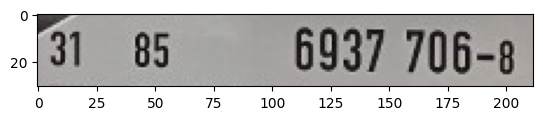

In [ ]:
RES = yoloRresults[5]

img = RES.orig_img

# Extract bounding boxes
boxes = RES.boxes.xyxy.tolist()

# Iterate through the bounding boxes
for i, box in enumerate(boxes):
    x1, y1, x2, y2 = box
    # Crop the object using the bounding box coordinates
    ultralytics_crop_object = img[int(y1):int(y2), int(x1):int(x2)]
    # Plot croped image
    plt.imshow(ultralytics_crop_object)
    plt.show()
    break

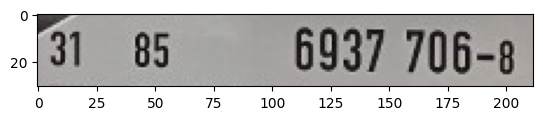

In [ ]:
plt.imshow(ultralytics_crop_object)

In [ ]:
reader = easyocr.Reader(['en'])



Progress: |██████████████████████████████████████████████████| 100.0% Complete

Progress: |██████████████████████████████████████████████████| 100.0% Complete

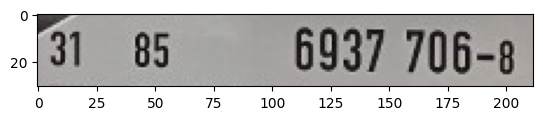

[([[1, 5], [23, 5], [23, 25], [1, 25]], '31', 0.6399621392275786), ([[106, 2], [208, 2], [208, 30], [106, 30]], '6937 706-8', 0.9776253913152456)]


'3169377068'

In [ ]:
plt.imshow(ultralytics_crop_object)
plt.show()
ocrEVN(ultralytics_crop_object)

In [ ]:
def ocrEVN(imgObject):

  ocrResult = reader.readtext(imgObject)
  #DEBUG:
  print(ocrResult)

  returnEVN =""
  for r in ocrResult:
    returnEVN += re.sub('\D','',str(r[1]))
    #DEBUG: print(re.sub('\D','',str(r[1])), '      Conf:', str(r[2]) )

    if r[2] < 0.45 and re.findall("[0-9]", str(r[1])): # if ocr confedence is smaller than threshhold return
        returnEVN = "to blurred or to far away"
        #DEBUG: print(re.sub('\D','',str(r[1])), '      Conf:', str(r[2]) )
        return returnEVN



  #DEBUG: print(returnEVN)
  return returnEVN


In [ ]:
def getEVNsFromResults(_yoloRresults):
    #iterate througt results
    for r in _yoloRresults:
        img = r.orig_img #Image without boxes

        plt.imshow(np.squeeze(r.plot())) #Images with boxes
        plt.show()

        # Extract bounding boxes
        boxes = r.boxes.xyxy.tolist()

        # Iterate through the bounding boxes
        for i, box in enumerate(boxes):
            x1, y1, x2, y2 = box
            # Crop the object using the bounding box coordinates
            ultralytics_crop_object = img[int(y1):int(y2), int(x1):int(x2)]

            #use ocr to extract EVN from Image
            EVN = ocrEVN(ultralytics_crop_object)
            print(EVN)
            print(isEVNValid(EVN))

            # Plot croped image
            # plt.imshow(ultralytics_crop_object)
            # plt.show()

In [ ]:
def isEVNValid(evn):
  if len(evn) != 12:
    return False
  else:
    return True

print(isEVNValid("12345678901"))


False


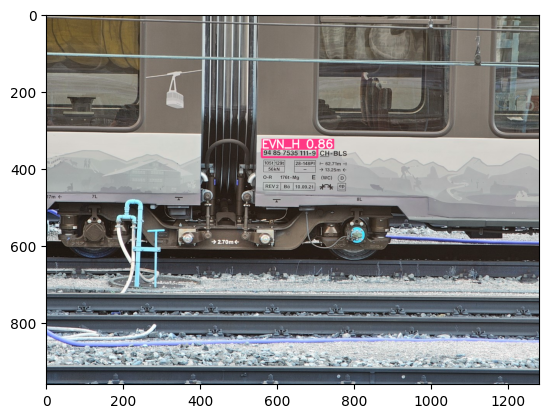

[([[3, 1], [143, 1], [143, 21], [3, 21]], '9485753511119', 0.7328619381229333)]
9485753511119
False


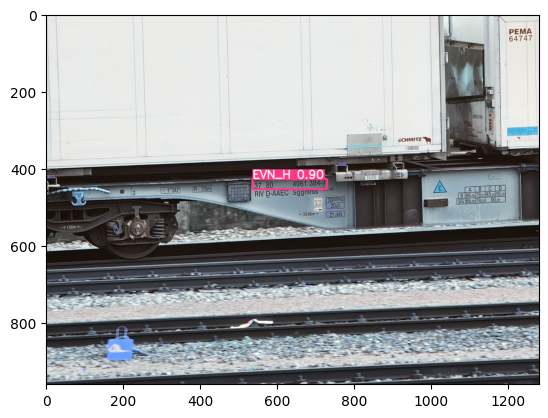

[([[1, 7], [25, 7], [25, 26], [1, 26]], '37', 0.8248234391212463), ([[32, 4], [58, 4], [58, 26], [32, 26]], '80', 0.9999983984201323), ([[100, 0], [192, 0], [192, 24], [100, 24]], '496138447', 0.39371246777698776)]
to blurred or to far away
False


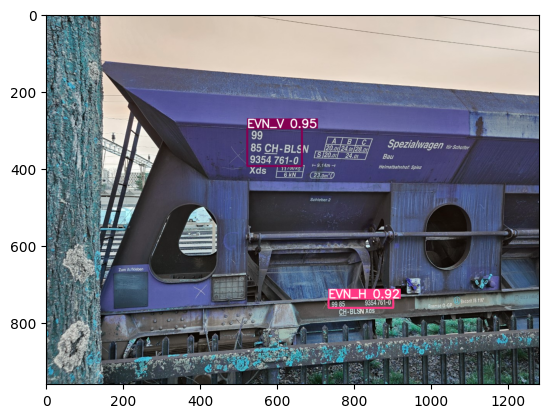

[([[8, 4], [46, 4], [46, 34], [8, 34]], '99', 0.9980043270455365), ([[5, 35], [142, 35], [142, 72], [5, 72]], '850488', 0.325121391472071), ([[3, 65], [141, 65], [141, 98], [3, 98]], '935476120', 0.9299875189686855)]
to blurred or to far away
False
[([[5, 5], [45, 5], [45, 24], [5, 24]], '9985', 0.9999921917915344), ([[90, 0], [168, 0], [168, 22], [90, 22]], '935476120', 0.5834172920644503)]
9985935476120
False


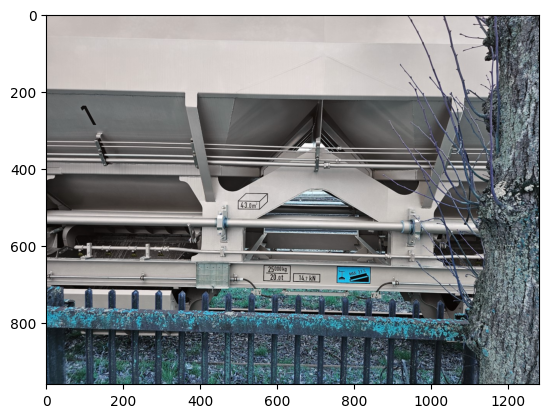

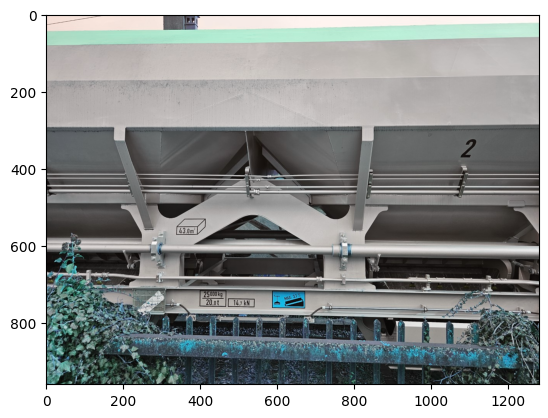

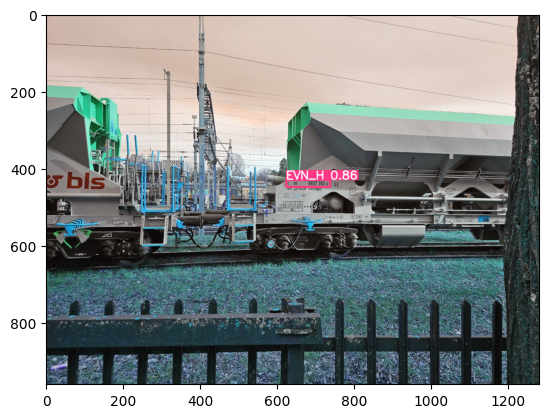

[([[57, 3], [113, 3], [113, 18], [57, 18]], '693770726', 0.614815139170492)]
693770726
False


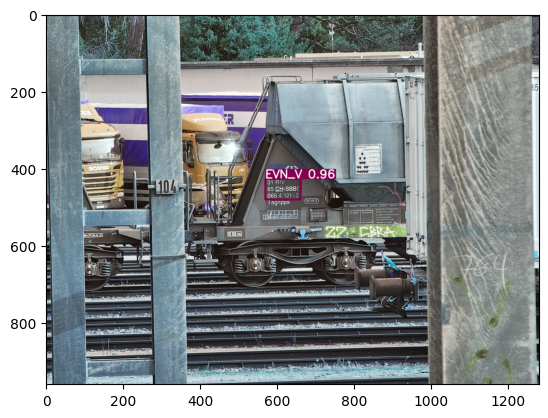

[([[3, 0], [53, 0], [53, 19], [3, 19]], '311', 0.7149743492949517), ([[3, 17], [91, 17], [91, 37], [3, 37]], '8548588', 0.20144583939061425), ([[5, 37], [89, 37], [89, 53], [5, 53]], '066412122', 0.7085080003465114)]
to blurred or to far away
False


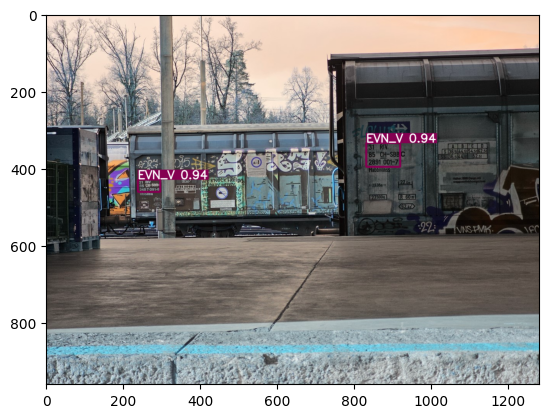

[([[0, 1], [59, 1], [59, 21], [0, 21]], '13118', 0.11012244273172143), ([[2, 16], [88, 16], [88, 43], [2, 43]], '85454588', 0.20062252932579963), ([[2, 38], [86, 38], [86, 62], [2, 62]], '289100177', 0.4169989504457797)]
to blurred or to far away
False
[([[18, 0], [58, 0], [58, 24], [18, 24]], '845883', 0.05319464540621749), ([[4, 22], [56, 22], [56, 30], [4, 30]], '346709176', 0.14137387666689255)]
to blurred or to far away
False


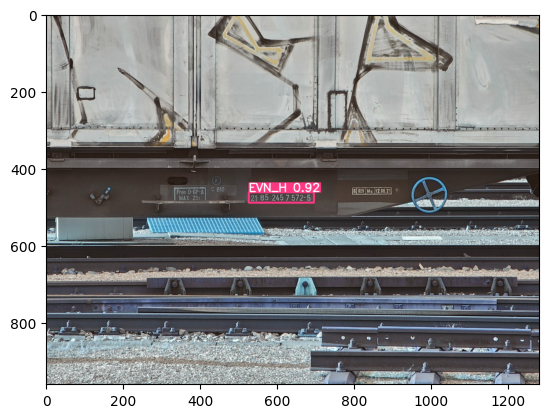

[([[2, 0], [166, 0], [166, 27], [2, 27]], '2185245757225', 0.7791266767408503)]
2185245757225
False


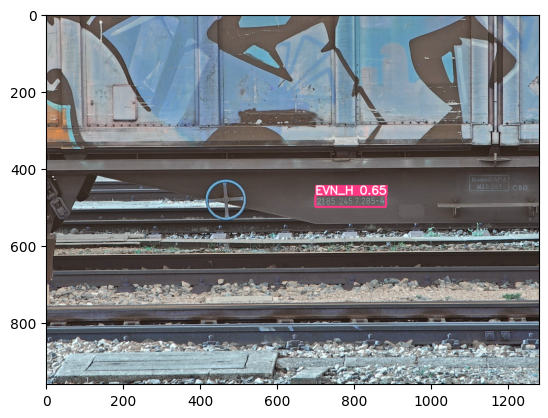

[([[0, 2], [160, 2], [160, 31], [0, 31]], '21852457285', 0.9969475839759769)]
21852457285
False


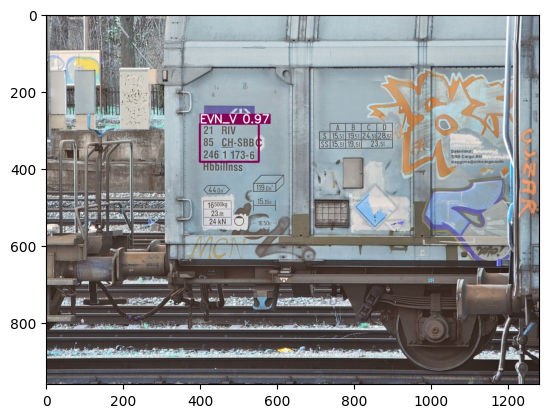

[([[6, 2], [40, 2], [40, 34], [6, 34]], '21', 1.0), ([[54, 4], [98, 4], [98, 34], [54, 34]], '39', 0.20145248962411236), ([[6, 34], [42, 34], [42, 64], [6, 64]], '85', 0.9999895475975691), ([[54, 33], [145, 33], [145, 65], [54, 65]], '14888', 0.38714948290451673), ([[6, 66], [148, 66], [148, 98], [6, 98]], '246117316', 0.636921659730245)]
to blurred or to far away
False


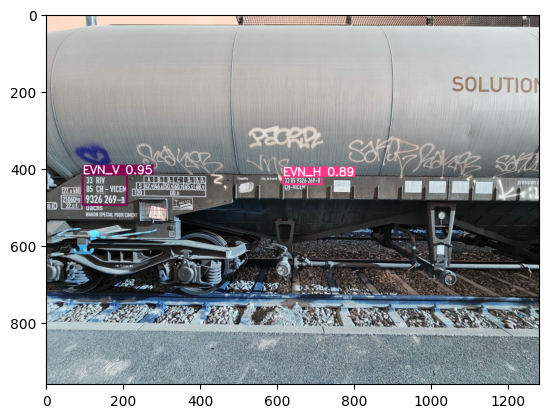

[([[6, 2], [62, 2], [62, 28], [6, 28]], '3389', 0.3318803906440735), ([[6, 24], [115, 24], [115, 52], [6, 52]], '8504516', 0.10266235274218288), ([[4, 50], [115, 50], [115, 79], [4, 79]], '932626928', 0.60940509970428)]
to blurred or to far away
False
[([[1, 1], [101, 1], [101, 20], [1, 20]], '3385932626928', 0.8314801846349487)]
3385932626928
False


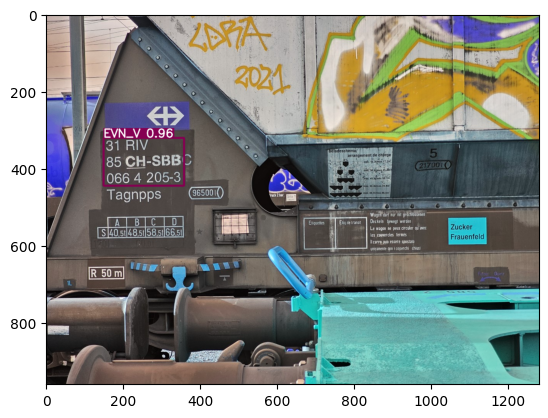

[([[1, 0], [121, 0], [121, 39], [1, 39]], '318', 0.5942773711799063), ([[0, 33], [209, 33], [209, 86], [0, 86]], '8514588', 0.20019986230572456), ([[3, 83], [207, 83], [207, 124], [3, 124]], '06642053', 0.9894937004073556)]
to blurred or to far away
False


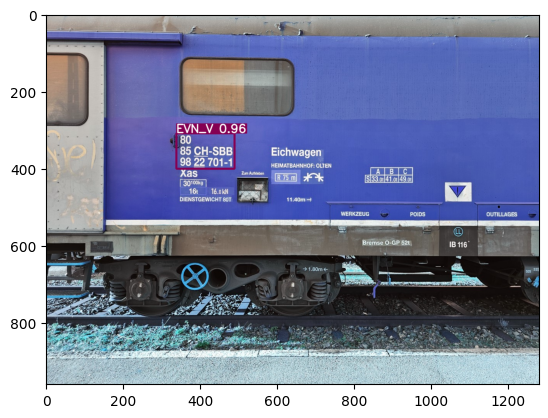

[([[6, 2], [44, 2], [44, 34], [6, 34]], '80', 0.9224229552934705), ([[5, 29], [151, 29], [151, 65], [5, 65]], '854588', 0.3232778003580761), ([[5, 57], [151, 57], [151, 92], [5, 92]], '982270121', 0.4368032139644468)]
to blurred or to far away
False


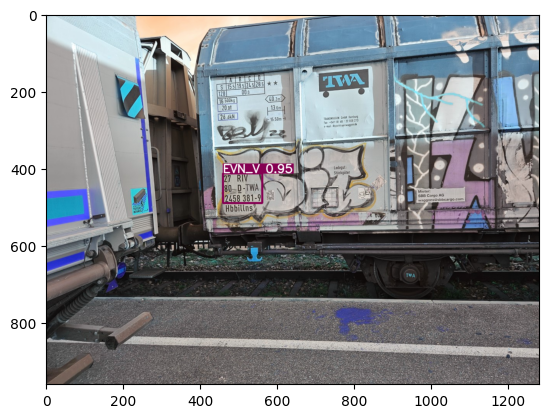

[([[0, 0], [24, 0], [24, 28], [0, 28]], '27', 0.9999947737947846), ([[34, 0], [68, 0], [68, 26], [34, 26]], '8', 0.12402431097542266), ([[0, 26], [30, 26], [30, 52], [0, 52]], '80', 0.999471687991614), ([[0, 50], [102, 50], [102, 77], [0, 77]], '245838129', 0.8027645269067605), ([[32.602760701502135, 25.345245332854052], [95.63545170714862, 20.566684159270046], [96.39723929849787, 49.654754667145944], [33.364548292851374, 54.43331584072995]], '9714', 0.29881376028060913)]
to blurred or to far away
False


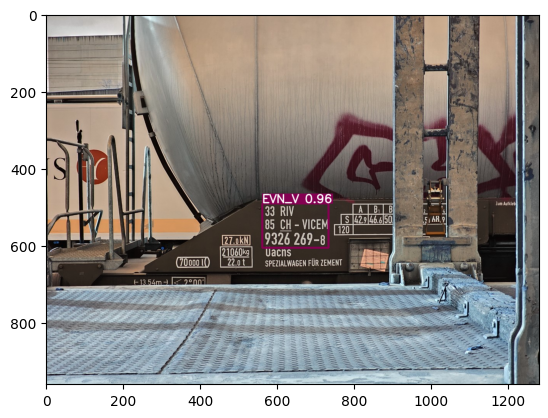

[([[1, 1], [89, 1], [89, 39], [1, 39]], '338', 0.737214137318294), ([[1, 35], [83, 35], [83, 75], [1, 75]], '8504', 0.47689470648765564), ([[99, 37], [172, 37], [172, 73], [99, 73]], '16', 0.4918007771647626), ([[0, 68], [172, 68], [172, 115], [0, 115]], '932626928', 0.8305752685110434)]
338850416932626928
False


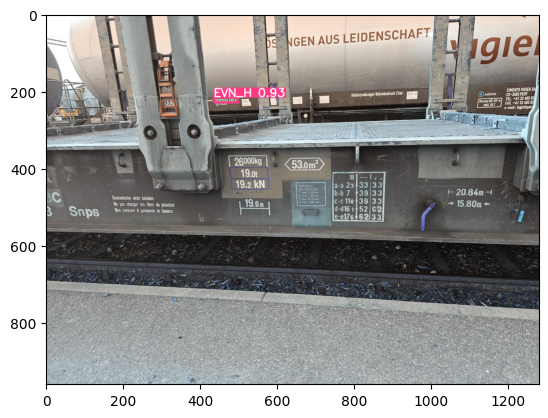

[([[3, 1], [63, 1], [63, 13], [3, 13]], '06982622041', 0.13284144291796063)]
to blurred or to far away
False


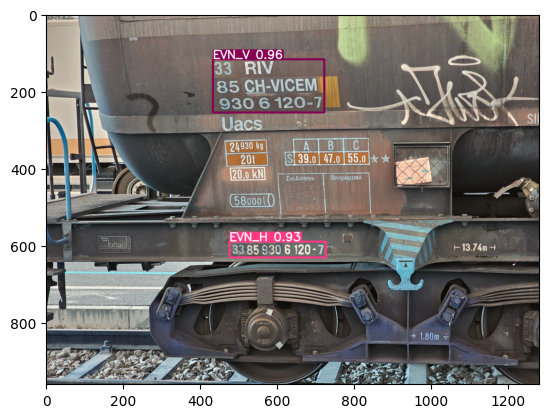

[([[0, 1], [55, 1], [55, 45], [0, 45]], '33', 0.9999996628252286), ([[78, 0], [164, 0], [164, 46], [78, 46]], '39', 0.17257481383421835), ([[4, 39], [278, 39], [278, 96], [4, 96]], '8544126', 0.1017231101197092), ([[10, 90], [288, 90], [288, 138], [10, 138]], '930612027', 0.841037541602085)]
to blurred or to far away
False
[([[1, 1], [231, 1], [231, 41], [1, 41]], '338593061204', 0.5310180579330426)]
338593061204
True


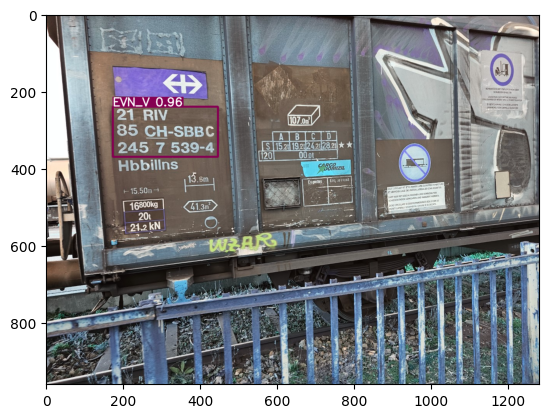

[([[5, 0], [61, 0], [61, 41], [5, 41]], '21', 0.9999291788806336), ([[75, 1], [147, 1], [147, 43], [75, 43]], '319', 0.19563567778530497), ([[4, 38], [270, 38], [270, 86], [4, 86]], '8514588', 0.2738284536347503), ([[9, 85], [99, 85], [99, 127], [9, 127]], '245', 0.9459267258644104), ([[109, 85], [269, 85], [269, 127], [109, 127]], '753974', 0.3267824655261185)]
to blurred or to far away
False


In [ ]:
getEVNsFromResults(yoloRresults)

In [ ]:
#super sad, cv2.imshow is not working in colab. Thats why workaround is needed
#for r in results:
#        cv2.imshow('YOLO', np.squeeze(r.plot()))

for r in results:
  plt.imshow(np.squeeze(r.plot()))
  plt.show()

In [ ]:
videoPath = '/content/drive/MyDrive/Colab_Notebooks/Data/Video/480p.mp4'
#results = model(source = videoPath, save = True, stream = True)

In [ ]:
model.predict('/content/drive/MyDrive/Colab_Notebooks/Data/Video/full.mp4', save=True, imgsz=1280, augment = True, conf = 0.1)

In [ ]:
!ffmpeg -i {"runs/detect/predict/full.avi"} -vcodec libx264 {"final2.mp4"}

In [ ]:
from IPython.display import HTML
from base64 import b64encode
mp4 = open('final2.mp4','rb').read()
data_url = "data:video/mp4;base64," + b64encode(mp4).decode()
HTML("""
<video width=400 controls>
      <source src="%s" type="video/mp4">
</video>
""" % data_url)

# Neuer Abschnitt